# TSNE Torch

This notebook computes the TSNE of datapoints in the feature spaces of extracted features using PyTorch pretrained models on other benchmark datasets.

**Author**: Sasha Petrenko <sap625@mst.edu>

**Date**: 3/4/2023

## 1. Imports and Options

First, import all dependencies, such as pandas for DataFrames, TSNE from scikit-learn, and plotting utils.

In [1]:
# stdlib imports
from pathlib import Path

# Installed imports
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE               # TSNE
from sklearn.preprocessing import MinMaxScaler  # normalizing TSNE results
import matplotlib as mpl                        # plot formatting
import matplotlib.pylab as plt                  # plotting

# Inline the plots for notebooks
%matplotlib inline

In [8]:
import torch

# Point to the filenames
file_dir = Path("models") 
train_file = file_dir.joinpath("mnist_train.pt")
test_file = file_dir.joinpath("mnist_test.pt")
train_targets_file = file_dir.joinpath("mnist_train_targets.pt")
test_targets_file = file_dir.joinpath("mnist_test_targets.pt")

# If we have the files, simply load
# if train_file.is_file() and test_file.is_file():
features_train = torch.load(train_file)
targets_train = torch.load(train_targets_file)

n_samples = 2000
X_raw = features_train.numpy()[:n_samples]
Y = targets_train.numpy()[:n_samples]
# features_test = torch.load(test_file)

In [9]:
# Create a tsne object targeting two dimensions for visualization
tsne = TSNE(n_components=2, random_state=0)
# Fit the data using TSNE
X = tsne.fit_transform(X_raw)
# Normalize the transformed features
X = MinMaxScaler().fit_transform(X)

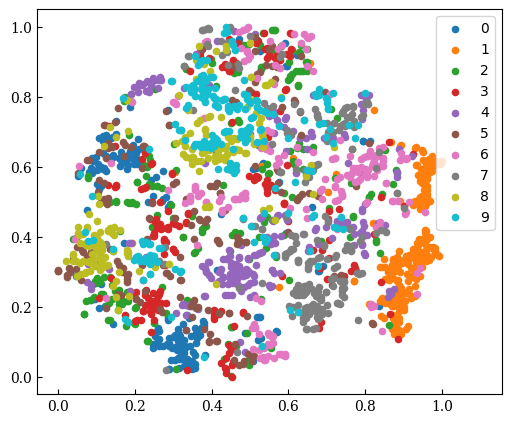

In [12]:
from src.colors import okabe_ito

# Create the figure
# fig = plt.figure(figsize=(6, 5), dpi=350)
fig = plt.figure(figsize=(6, 5))

# The IDs are incremental for the labels
# target_ids = range(len(names))
target_ids = range(10)

# Reset plotting settings
plt.rcParams.update(mpl.rcParamsDefault)
# Set the new plot settings and update the plot's rcParams
params = {"font.family": "serif"}
plt.rcParams.update(params)
ax = plt.gca()
ax.tick_params(direction='in')

# Set the style of the plot
# plt.style.use('fast')
plt.style.use('default')
# plt.grid(zorder=0)
# Scatter each class individually
# for i, c in zip(target_ids, okabe_ito):
for i in target_ids:
    plt.scatter(
        X[Y==i, 0],
        X[Y==i, 1],
        # color=c,
        # label=pretty_names[label],
        label=i,
        s=20,
        zorder=3,
    )

# Scaling and formatting
plt.legend(
    loc='upper right',
    # shadow=True,
)
left, right = plt.xlim()
l_scale = 1.1
r_scale = 1.1
plt.xlim(l_scale*left, r_scale*right)

plt.show()